# Show tqdm progress bars for all primrary index creation operations

When creating an index, you can optionally set the `show_progress` flag from the `from_documents` index creation call to see tqdm progress bars for the slowest parts of the indexing process (e.g parsing nodes from a document, creating embeddings...etc.)

`KeywordTableIndex.from_documents(documents=documents, show_progress=True)`

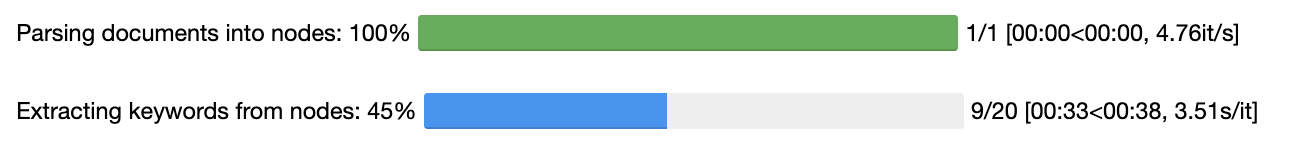

Install and upgrade `ipywidgets` if the tqdm progress bars don't look like the image above.

`pip install ipywidgets --upgrade`

`jupyter nbextension enable --py widgetsnbextension`

run `jupyter notebook` from the root directory to have access to the `paul_graham` data in the `/examples` folder.

In [1]:
from llama_index import (
    VectorStoreIndex,
    SimpleDirectoryReader,
    ResponseSynthesizer,
    DocumentSummaryIndex,
    LLMPredictor,
    ServiceContext,
    KeywordTableIndex,
    KnowledgeGraphIndex,
    ListIndex,
    MockLLMPredictor,
    TreeIndex,
)
import os
import openai
from langchain.chat_models import ChatOpenAI
from llama_index.storage.storage_context import StorageContext
from langchain import OpenAI
from llama_index.graph_stores import SimpleGraphStore

In [2]:
# Set environment variable
os.environ["OPENAI_API_KEY"] = "<OPEN AI KEY>"
openai.api_key = os.getenv("OPENAI_API_KEY")

In [3]:
# Load documents
documents = SimpleDirectoryReader("../../../docs/examples/data/paul_graham").load_data()

### VectorStoreIndex

In [9]:
print("\nVectorStoreIndex with show_progress=True\n")
VectorStoreIndex.from_documents(documents, show_progress=True)

print("\nVectorStoreIndex with show_progress=False\n")
VectorStoreIndex.from_documents(documents, show_progress=False)

print("\nVectorStoreIndex with show_progress=True, use_async=True\n")
VectorStoreIndex.from_documents(documents, show_progress=True, use_async=True)

# print("\nVectorStoreIndex with show_progress=True, use_async=False\n")
# VectorStoreIndex.from_documents(documents, show_progress=False, use_async=False)


VectorStoreIndex with show_progress=True



Parsing documents into nodes:   0%|          | 0/1 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/20 [00:00<?, ?it/s]


VectorStoreIndex with show_progress=False


VectorStoreIndex with show_progress=True, use_async=True



Parsing documents into nodes:   0%|          | 0/1 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/2 [00:00<?, ?it/s]

### DocumentSummaryIndex

In [10]:
llm_predictor_chatgpt = LLMPredictor(
    llm=ChatOpenAI(temperature=0, model_name="gpt-3.5-turbo")
)
service_context = ServiceContext.from_defaults(
    llm_predictor=llm_predictor_chatgpt, chunk_size=1024
)

print("\nDocumentSummaryIndex with show_progress=True\n")
response_synthesizer = ResponseSynthesizer.from_args(
    response_mode="tree_summarize", use_async=True
)
DocumentSummaryIndex.from_documents(
    documents,
    service_context=service_context,
    response_synthesizer=response_synthesizer,
    show_progress=True,
)

print("\nDocumentSummaryIndex with show_progress=False\n")
DocumentSummaryIndex.from_documents(
    documents,
    service_context=service_context,
    response_synthesizer=response_synthesizer,
    show_progress=False,
)


DocumentSummaryIndex with show_progress=True



Parsing documents into nodes:   0%|          | 0/1 [00:00<?, ?it/s]

Summarizing documents:   0%|          | 0/1 [00:00<?, ?it/s]

current doc id: 5d42d800-225f-4826-84db-e168f1d21409

DocumentSummaryIndex with show_progress=False

current doc id: 5d42d800-225f-4826-84db-e168f1d21409


/Users/abdul/Desktop/llama_index_fork/.venv/lib/python3.11/site-packages/pygments/regexopt.py:77: RuntimeWarning: coroutine 'VectorStoreIndex._async_add_nodes_to_index' was never awaited
  '|'.join(regex_opt_inner(list(group[1]), '')
/Users/abdul/Desktop/llama_index_fork/.venv/lib/python3.11/site-packages/pygments/regexopt.py:77: RuntimeWarning: coroutine 'run_async_tasks.<locals>._gather' was never awaited
  '|'.join(regex_opt_inner(list(group[1]), '')


AuthenticationError: Incorrect API key provided: sk-MpL0C***************************************KFKy. You can find your API key at https://platform.openai.com/account/api-keys.

### KeywordTableIndex

In [ ]:
print("\nKeywordTableIndex with show_progress=True, use_async=True\n")
KeywordTableIndex.from_documents(
    documents=documents, show_progress=True, use_async=True
)

print("\nKeywordTableIndex with show_progress=True, use_async=False\n")
KeywordTableIndex.from_documents(
    documents=documents, show_progress=True, use_async=False
)

print("\nKeywordTableIndex with show_progress=False, use_async=True\n")
KeywordTableIndex.from_documents(documents=documents, use_async=True)

print("\nKeywordTableIndex with show_progress=False, use_async=False\n")
KeywordTableIndex.from_documents(documents=documents)

### KnowledgeGraphIndex

In [ ]:
print("\nKnowledgeGraphIndex with show_progress=True, use_async=False\n")
llm_predictor = LLMPredictor(llm=OpenAI(temperature=0, model_name="text-davinci-002"))
service_context = ServiceContext.from_defaults(
    llm_predictor=llm_predictor, chunk_size=512
)
graph_store = SimpleGraphStore()
storage_context = StorageContext.from_defaults(graph_store=graph_store)
KnowledgeGraphIndex.from_documents(
    documents,
    max_triplets_per_chunk=2,
    storage_context=storage_context,
    service_context=service_context,
    show_progress=True,
    use_async=False,
)
print("\nKnowledgeGraphIndex with show_progress=True, use_async=True\n")
llm_predictor = LLMPredictor(llm=OpenAI(temperature=0, model_name="text-davinci-002"))
service_context = ServiceContext.from_defaults(
    llm_predictor=llm_predictor, chunk_size=512
)
graph_store = SimpleGraphStore()
storage_context = StorageContext.from_defaults(graph_store=graph_store)
KnowledgeGraphIndex.from_documents(
    documents,
    max_triplets_per_chunk=2,
    storage_context=storage_context,
    service_context=service_context,
    show_progress=True,
    use_async=True,
)

### ListIndex

In [ ]:
print("\nListIndex with show_progress=True\n")
ListIndex.from_documents(documents=documents, show_progress=True)

print("\nListIndex with show_progress=False\n")
ListIndex.from_documents(documents=documents)

### TreeIndex

In [ ]:
print("\nTreeIndex with show_progress=True,  use_async=True\n")
llm_predictor = MockLLMPredictor(max_tokens=256)
service_context = ServiceContext.from_defaults(llm_predictor=llm_predictor)
TreeIndex.from_documents(
    documents, service_context=service_context, show_progress=True, use_async=True
)

print("\nTreeIndex with show_progress=True, use_async=False\n")
TreeIndex.from_documents(
    documents, service_context=service_context, show_progress=True, use_async=False
)

print("\nTreeIndex with show_progress=False, use_async=True\n")
TreeIndex.from_documents(documents, service_context=service_context, use_async=True)

print("\nTreeIndex with show_progress=False, use_async=False\n")
TreeIndex.from_documents(documents, service_context=service_context)